In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import math
%matplotlib inline

In [52]:
def noise_generator(samples, mu=0.0, beta=0.1):
    noise = np.random.normal(mu, beta, samples)
    return noise

def uniform_variable_generator(samples):
    random_ = rand(samples)
    return random_

class gaussian_basis:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def func_val(self, x):
        y = np.exp(-0.5*((x-self.mu)/self.sigma)**2)
        return y
    
def basis_vector(x, basis_dim):
    phi = np.zeros(basis_dim)
    for i in range(basis_dim):
        if (i == 0):
            phi[i] = x
        else:
            phi[i] = basis[i-1].func_val(x)
    return phi

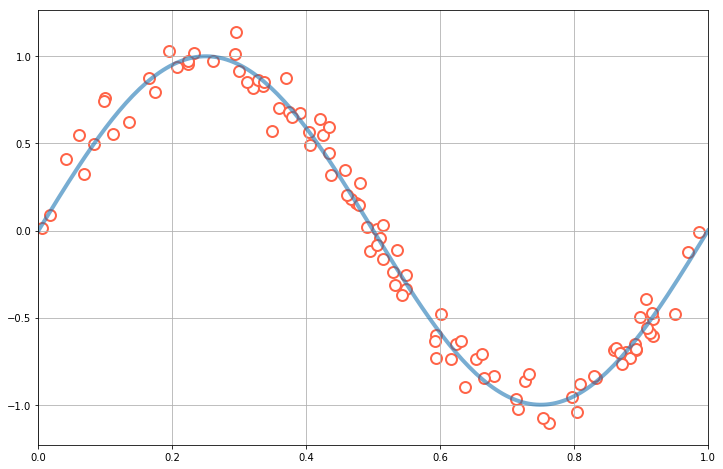

In [107]:
samples = 100

x = np.linspace(0, 1, 200)
x_rand = uniform_variable_generator(samples)
y_noised = np.sin(2 * np.pi * x_rand) + noise_generator(samples, beta=0.1)

plt.figure(figsize=(12,8))
plt.scatter(x_rand, y_noised, s=120, facecolor='white', edgecolors='tomato', linewidth=2)
plt.plot(x, np.sin(2 * np.pi * x), linewidth=4, alpha=0.6)
plt.xlim([0.0,1.0])
plt.grid()
plt.show()

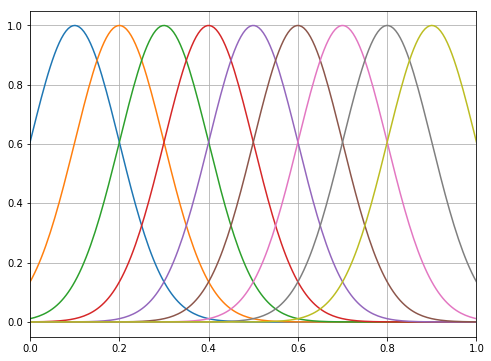

In [109]:
mu_basis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sigma_basis = 0.1

basis = []
for i, val in enumerate(mu_basis):
    base = gaussian_basis(val, sigma_basis)
    basis.append(base)
    
plt.figure(figsize=(8, 6))
for i, base in enumerate(basis):
    x = np.linspace(0, 1, 200)
    y = basis[i].func_val(x)
    plt.plot(x, y)
plt.xlim([0.0,1.0])
plt.grid()
plt.show()

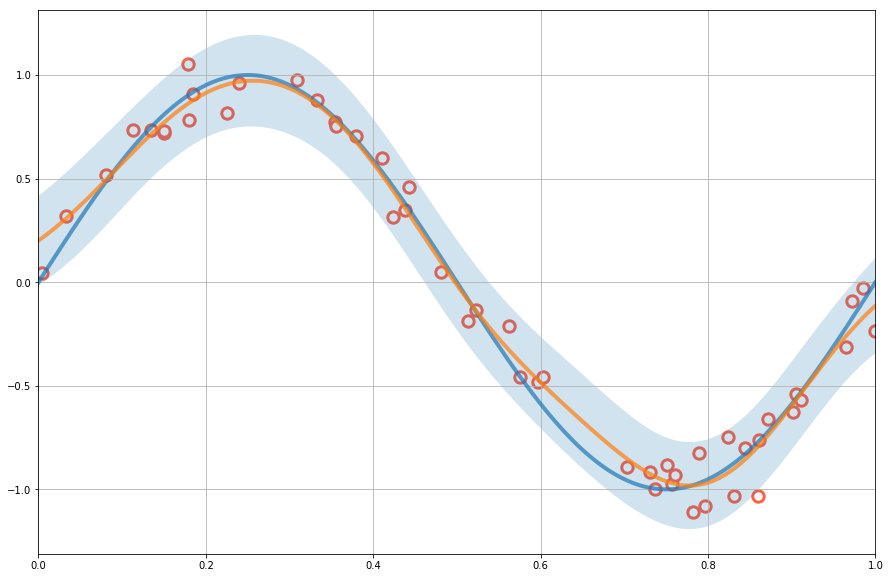

In [102]:
# Step1: design matrixの生成 N*M
samples = 50
basis_dim = 10
design_matrix = np.zeros((samples, basis_dim))

x_rand = uniform_variable_generator(samples)
y_noised = np.sin(2 * np.pi * x_rand) + noise_generator(samples, beta=0.1)
mu_basis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sigma_basis = 0.1
basis = []
for i, val in enumerate(mu_basis):
    base = gaussian_basis(val, sigma_basis)
    basis.append(base)

for i in range(samples):
    for j in range(basis_dim):
        if j == 0:
            design_matrix[i,j] = x_rand[i]
        else:
            design_matrix[i,j] = basis[j-1].func_val(x_rand[i])

# Step2: Sigma matrix(inversed)の生成
alpha = 2
beta = 25

I = np.identity(basis_dim)
S_n = alpha * I + beta * np.dot(design_matrix.T, design_matrix)

# Step3: 平均ベクトルの生成
m_n = beta * np.dot(np.dot(np.linalg.inv(S_n), design_matrix.T), y_noised)

# Step4: 分散の生成
x = np.linspace(0, 1, 200)
y_list = []
sigma_list = []
for i in range(x.shape[0]):
    y_list.append(np.dot(m_n.T, basis_vector(x[i], basis_dim)))
    sigma = math.sqrt(1/beta + np.dot(np.dot(basis_vector(x[i], basis_dim).T, np.linalg.inv(S_n)), basis_vector(x[i], basis_dim)))
    sigma_list.append(sigma)

# グラフ描画
plt.figure(figsize=(15, 10))
plt.scatter(x_rand, y_noised, s=130, facecolor='white', edgecolors='tomato', linewidth=3)
plt.plot(x, np.sin(2*np.pi*x), linewidth=4, alpha=0.7)
plt.plot(x, y_list, linewidth=4, alpha=0.7)
plt.fill_between(x,np.array(y_list) - np.array(sigma_list), np.array(y_list) + np.array(sigma_list),alpha=0.2)
plt.xlim([0.0,1.0])
plt.grid()
plt.show()